<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imputation" data-toc-modified-id="Imputation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imputation</a></span></li><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interpolation</a></span></li></ul></div>

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [244]:
data = pd.read_csv("./Datasets/SampleData.csv")

data = data.rename({"Date":"date", "reference":"ref", "target":"tar"}, axis=1)
data["date"] = pd.to_datetime(data["date"], format="%d-%m-%Y")
data = data.set_index("date")

data["missing"] = data.apply(lambda x:x["ref"] if np.isnan(x["tar"]) else np.nan, axis=1)

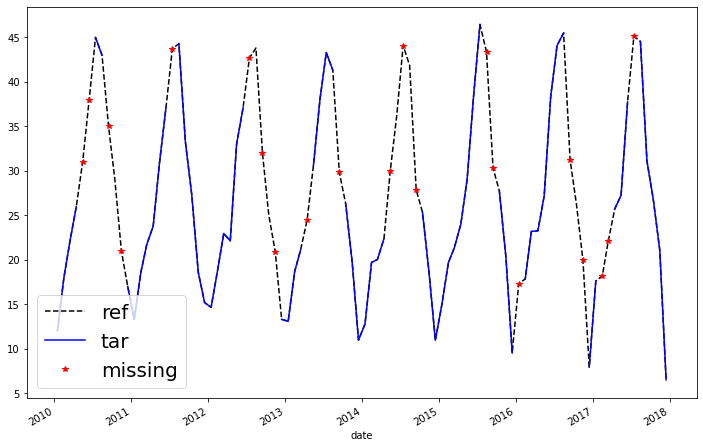

In [245]:
data.plot.line(style=["k--", "b-", "r*"], figsize=(12, 8));
plt.legend(fontsize=20);

# Imputation

In [246]:
data["LOCF"] = data["tar"].fillna(data["tar"].shift(1))
data["NOCB"] = data["tar"].fillna(data["tar"].shift(-1))
data["fill_mean"] = data["tar"].fillna(data["tar"].mean())
data["fill_median"] = data["tar"].fillna(data["tar"].median())
data["moving_avg"] = data["tar"].fillna(data["tar"].rolling(24, min_periods=1).mean())

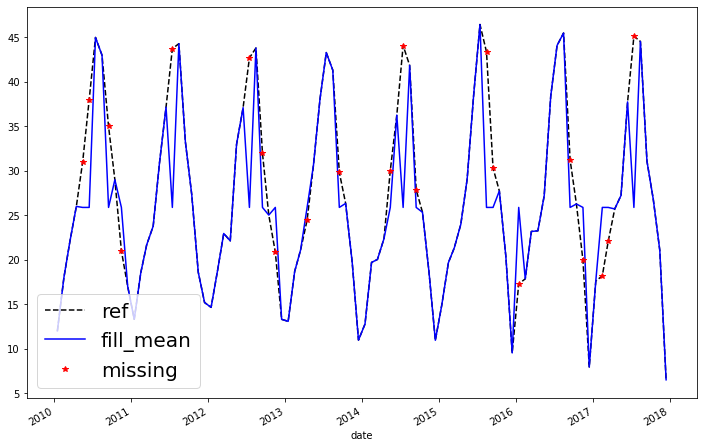

In [247]:
data[["ref", "fill_mean", "missing"]].plot.line(style=["k--", "b-", "r*"], figsize=(12, 8));
plt.legend(fontsize=20);

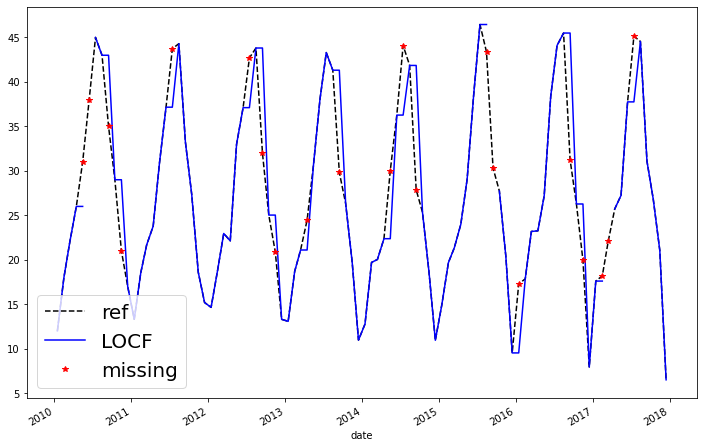

In [248]:
data[["ref", "LOCF", "missing"]].plot.line(style=["k--", "b-", "r*"], figsize=(12, 8));
plt.legend(fontsize=20, loc="lower left");

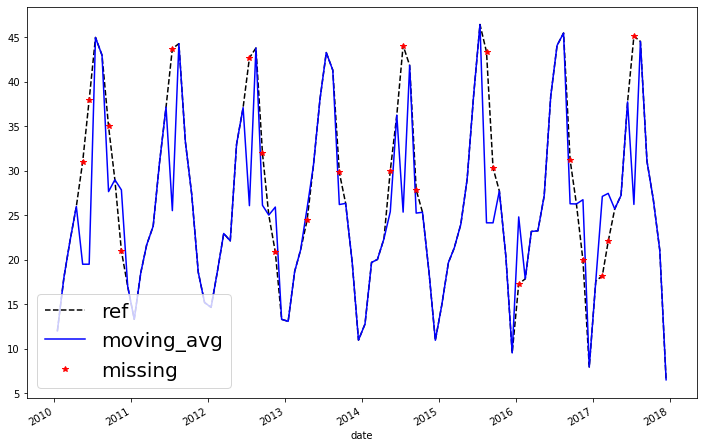

In [249]:
data[["ref", "moving_avg", "missing"]].plot.line(style=["k--", "b-", "r*"], figsize=(12, 8));
plt.legend(fontsize=20, loc="lower left");

# Interpolation

In [250]:
data["linear"] = data["tar"].interpolate(method="linear")
data["time"] = data["tar"].interpolate(method="time")
data["quadratic"] = data["tar"].interpolate(method="quadratic")
data["cubic"] = data["tar"].interpolate(method="cubic")
data["slinear"] = data["tar"].interpolate(method="slinear")
data["akima"] = data["tar"].interpolate(method="akima") 
data["poynomial5"] = data["tar"].interpolate(method="polynomial", order=5)
data["poynomial7"] = data["tar"].interpolate(method="polynomial", order=7)
data["spline3"] = data["tar"].interpolate(method="spline", order=3)
data["spline4"] = data["tar"].interpolate(method="spline", order=4)
data["spline5"] = data["tar"].interpolate(method="spline", order=5)

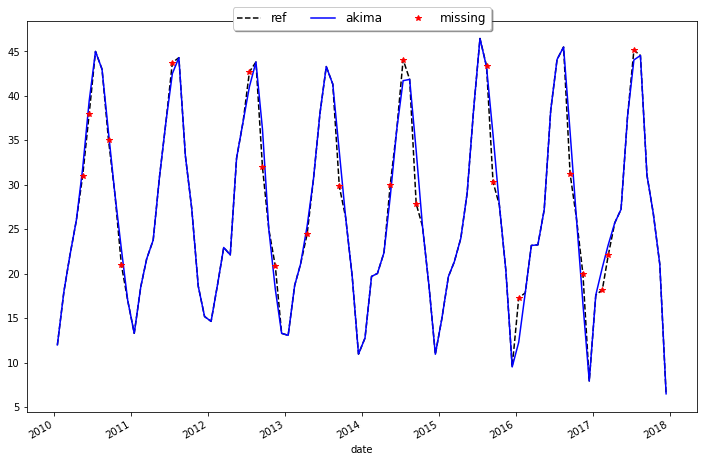

In [252]:
res = [(method, round(r2_score(data["ref"], data[method]), 4)) for method in list(data)[5:]]
res = pd.DataFrame(np.array(res), columns=["method", "r_squared"])
res = res.sort_values(by="r_squared", ascending=False)

best_method = res["method"].iloc[0]
final_data = data[["ref", best_method, "missing"]]
final_data.plot(style=["k--", "b-", "r*"], figsize=(12, 8));
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True, ncol=10, fontsize=12);